### Load Datasets

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from NN import NN
from util import compute_clean_data
import matplotlib.pyplot as plt 

# init datasets
full_train_X, full_train_Y = compute_clean_data("data/mnist_train.csv")
full_test_X, full_test_Y = compute_clean_data("data/mnist_test.csv")

mini_train_X, mini_train_Y = compute_clean_data("data/mnist_train_100.csv")
mini_test_X, mini_test_Y = compute_clean_data("data/mnist_test_10.csv")

half_train_X, half_train_Y = full_train_X[30000:], full_train_Y[30000:]
half_test_X, half_test_Y = full_test_X[5000:], full_test_Y[5000:]


[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

### Define Train Function using Stochastic Gradient Descent

In [4]:
from util import randomize_order

def train(nn, epochs, lr, train_X, train_Y, valid_X, valid_Y, show_loss=True):
    # Set datasets
    nn.setAlpha(lr)
    nn.setTrainData(train_X, train_Y)
    nn.setTestData(valid_X, valid_Y)

    # Stochastic Gradient Descent 
    losses = []

    for _ in range(epochs):    
        # Randomize order of training data for this epoch
        X, Y  = randomize_order(nn.train_X, nn.train_Y)
        nn.setTrainData(train_X=X, train_Y=Y)

        # Train 
        avg_loss = nn.train(show_loss)
        losses.append(avg_loss)
    return losses

def plot_loss_over_epoch(losses, epochs):
    plt.title('Loss over epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(list(range(1, epochs + 1)), losses)
    plt.show()

### Find Optimal Learning Rate using K-Fold Cross Validation

In [102]:
# Initialize parameters 
test_X, test_Y = full_test_X, full_test_Y
X, Y = full_train_X, full_train_Y
batch_size = 10000
N = X.shape[0]
epochs = 5
show_loss = False 

# Initialize Neural Network 
nn = NN(
    numNeurons=[784, 200, 100, 10],
    alpha=0.001,
    train_X=full_train_X,
    train_Y=full_train_Y,
)

alphas = [0.001, 0.005, 0.0075, 0.008, 0.01, 0.025]
losses = []
accs = []
for i, alpha in enumerate(alphas):
    nn.setAlpha(alpha)

    # Validation data
    valid_X = X.take(range(i, i + batch_size), axis=0, mode='wrap')
    valid_Y = Y.take(range(i, i + batch_size), axis=0, mode='wrap')

    # Train data 
    train_X = X.take(range(i + batch_size, i + N), axis=0, mode='wrap')
    train_Y = Y.take(range(i + batch_size, i + N), axis=0, mode='wrap')

    # Train network using current learning rate
    cur_losses = train(nn, epochs, alpha, train_X, train_Y, valid_X, valid_Y, show_loss)    
    avg_loss = sum(cur_losses) / epochs
    losses.append(avg_loss)

    # Test Network using newly learned weights 
    acc = nn.test()
    accs.append(acc)
    
    # Randomize weights between folds 
    nn.randomizeWeights()

Accuracy = 0.9108
Accuracy = 0.9351
Accuracy = 0.9487
Accuracy = 0.9408
Accuracy = 0.9469
Accuracy = 0.8374


### Visualize sata  

Optimal learning rate is 0.0075
An lr of 0.001 yielded 4.6191554790083496 loss and 91.08000000000001% accuracy.
An lr of 0.005 yielded 4.721635150320417 loss and 93.51% accuracy.
An lr of 0.0075 yielded 4.858628357828679 loss and 94.87% accuracy.
An lr of 0.008 yielded 4.896072492613568 loss and 94.08% accuracy.
An lr of 0.01 yielded 4.850562354860462 loss and 94.69% accuracy.
An lr of 0.025 yielded 5.334482274639939 loss and 83.74000000000001% accuracy.


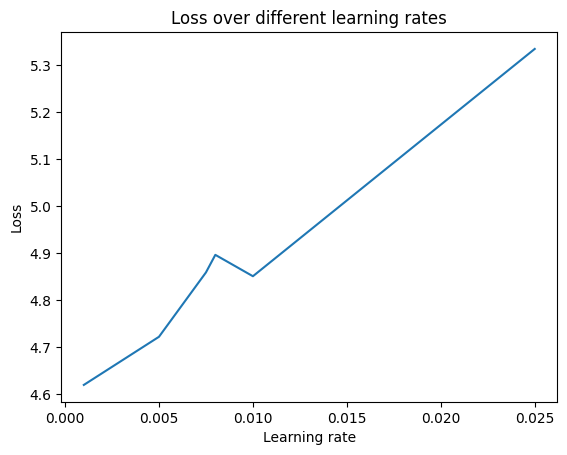

In [103]:
# Determine best learning rate 
opt_lr = alphas[accs.index(max(accs))]
print(f"Optimal learning rate is {opt_lr}")

for i in range(len(alphas)):
    print(f"An lr of {alphas[i]} yielded {losses[i]} loss and {accs[i] * 100}% accuracy.")

# Visualize loss over learning rate
plt.title('Loss over different learning rates')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.plot(alphas, losses)
plt.show()

### Train and test todel using optimal learning rate

Loss on iteration 10000 = 5.153682150022401
Loss on iteration 20000 = 6.986143233407038
Loss on iteration 30000 = 3.691086969576988
Loss on iteration 40000 = 5.262982786302679
Loss on iteration 50000 = 6.225856881143555
Loss on iteration 60000 = 3.315529635378694
Loss on iteration 10000 = 6.084690603103428
Loss on iteration 20000 = 5.3266899251733255
Loss on iteration 30000 = 5.4081083579046005
Loss on iteration 40000 = 5.104553458803985
Loss on iteration 50000 = 5.873727834620752
Loss on iteration 60000 = 5.125586077555166
Loss on iteration 10000 = 5.5114854867397405
Loss on iteration 20000 = 4.981222779292374
Loss on iteration 30000 = 6.093449911503545
Loss on iteration 40000 = 6.802723483685495
Loss on iteration 50000 = 3.6952414942276066
Loss on iteration 60000 = 5.348977780715989
Loss on iteration 10000 = 5.26377672924198
Loss on iteration 20000 = 6.477777221255093
Loss on iteration 30000 = 4.7338917559525315
Loss on iteration 40000 = 6.361421466930818
Loss on iteration 50000 = 5.

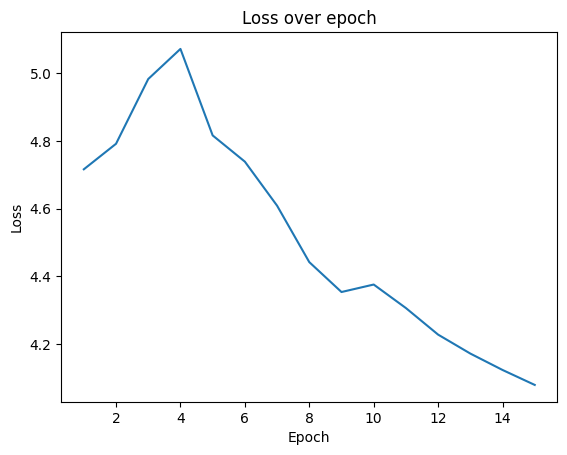

Accuracy = 0.965


In [5]:
# Initialize Neural Network 
nn = NN(
    numNeurons=[784, 200, 100, 10],
    alpha=0.0075,
    train_X=full_train_X,
    train_Y=full_train_Y,
    test_X=full_test_X,
    test_Y=full_test_Y
)
epochs = 15

# Train network using optimal learning rate 
losses = train(
        nn=nn, 
        epochs=epochs, 
        lr=0.0075, 
        train_X=full_train_X, 
        train_Y=full_train_Y, 
        valid_X=full_test_X, 
        valid_Y=full_test_Y
    )

# Visualize loss during training
plot_loss_over_epoch(losses, epochs)

# Determine accuracy of the network 
acc = nn.test()


### Testing network on hand drawn images

In [11]:
test_6 = [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.09, 0.46, 0.22, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.18, 0.89, 1, 0.81, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1, 0.89, 1, 0.96, 0.4, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.03, 0.76, 1, 0.96, 0.25, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.53, 1, 1, 0.35, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.21, 0.99, 1, 0.58, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.77, 1, 0.85, 0.05, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.28, 1, 1, 0.29, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.71, 1, 0.78, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.07, 0.98, 1, 0.37, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.3, 1, 0.99, 0.07, 0.01, 0.01, 0.01, 0.18, 0.57, 0.72, 0.7, 0.56, 0.15, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.47, 1, 0.83, 0.01, 0.01, 0.01, 0.42, 0.98, 1, 1, 1, 1, 0.97, 0.26, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.56, 1, 0.71, 0.01, 0.01, 0.42, 1, 1, 0.88, 0.55, 0.58, 0.91, 1, 0.86, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.56, 1, 0.67, 0.01, 0.31, 0.99, 1, 0.75, 0.06, 0.01, 0.01, 0.25, 1, 1, 0.06, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.56, 1, 0.72, 0.13, 0.94, 1, 0.81, 0.06, 0.01, 0.01, 0.01, 0.25, 1, 1, 0.05, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.4, 1, 0.97, 0.7, 1, 0.92, 0.13, 0.01, 0.01, 0.01, 0.01, 0.51, 1, 0.88, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.06, 0.92, 1, 1, 1, 0.43, 0.01, 0.01, 0.01, 0.01, 0.22, 0.97, 1, 0.55, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.27, 0.98, 1, 1, 0.65, 0.29, 0.15, 0.07, 0.36, 0.94, 1, 0.87, 0.07, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.25, 0.86, 1, 1, 1, 1, 1, 1, 1, 0.92, 0.19, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.03, 0.42, 0.8, 0.99, 1, 1, 1, 0.74, 0.13, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.05, 0.16, 0.18, 0.14, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
test_6_ = []
for row in test_6:
    for entry in row:
        test_6_.append(entry)

hand_drawn_6 = np.array(test_6_)

test_X = full_test_X[0]
test_Y = full_test_Y[0]

o3, num = nn.predict(hand_drawn_6)
print(o3)
print(num)

[[0.08353734]
 [0.10062652]
 [0.07690531]
 [0.10807031]
 [0.10254777]
 [0.27691451]
 [0.06573736]
 [0.03682735]
 [0.07147105]
 [0.07736247]]
5


### Accessing weights of Optimal Network

In [8]:
import json 
# print(nn.hiddenLayer1.weights.shape)
# print(nn.hiddenLayer2.weights.shape)
# np.savez("weights", h1W=nn.hiddenLayer1.weights, h2W=nn.hiddenLayer2.weights, oW=nn.outputLayer.weights)
# h1W = nn.hiddenLayer1.weights.tolist()
# h2W = nn.hiddenLayer2.weights.tolist()
# oW = nn.outputLayer.weights.tolist()

# h1B = nn.hiddenLayer1.bias.tolist()
# h2B = nn.hiddenLayer2.bias.tolist()
# oB = nn.outputLayer.bias.tolist()

# with open('model_weights.json', 'w') as f:
#     json.dump({'h1': h1W, 'h2': h2W, 'o': oW}, f)

# with open('bias.json', 'w') as f:
#     json.dump({'h1': h1B, 'h2': h2B, 'o': oB}, f)


 
# with open('test_input_output.json', 'w') as f:
#     json.dump({'X': full_test_X[0].tolist(), 'Y': full_test_Y[0].tolist()}, f)

